In [1]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

In [2]:
model_info = [
'Aord_size',
 'Themes_size',
 'num_nodes',
 'num_pnode',
 'num_onode',
 'num_edge',
 'max_given_themes_num',
 'num_propvar',
 'max_given_logics_num',
]

constraints_names = [

    'tr', 
    'nnp',
    'nsa', 
    'kos',
    'nss',
    
    'aass',
    'i',
    'vi',
    'bat',
    'pr',
    'mat',
    'manss',
    'ss',
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]

# Compare the computation time for each PC.

In [3]:
df1 = pd.read_csv("./time_data_subPC.csv")
df2 = pd.read_csv("./time_data_mainPC.csv")

print(df1.shape)
print(df2.shape)

df1 = df1[df1["num_propvar"] < 3]
df2 = df2[df2["num_propvar"] < 3]



(235556, 49)
(316466, 49)


In [4]:
# 二つのPCでの計算時間の比較

df1.describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,nnp_time,nsa_time,kos_time,nss_time,aass_time,i_time,vi_time,bat_time,pr_time,mat_time,manss_time,ss_time,esr_time,ensr_time,eos_time,das_time,nwci_time,faD_time,faW_time
count,157220.000000,157220.000000,157220.000000,157220.000000,157220.000000,157220.000000,157220.000000,157220.000000,157220.000000,1.572200e+05,1.572200e+05,1.572200e+05,1.572200e+05,157220.000000,157220.000000,157220.000000,1.572200e+05,1.572200e+05,157220.000000,157220.000000,157220.000000,157220.000000,157220.000000,157220.000000,157220.000000,1.572200e+05,157220.000000,157220.000000,157220.000000
mean,2.745440,2.500744,4.907175,2.161735,2.745440,12.775181,1.806583,1.500668,2.408110,7.282672e-06,5.038886e-06,2.134168e-06,2.395066e-06,0.000004,0.000439,0.000374,1.495900e-06,6.523460e-04,0.001241,0.000682,0.001111,0.001454,0.000089,0.000083,0.000075,4.605671e-04,0.001228,0.145566,0.101540
std,2.479328,1.119288,2.861495,1.843162,2.479328,16.403035,0.902160,0.500001,1.072077,7.784671e-06,2.616405e-06,7.975431e-07,1.409878e-06,0.000005,0.001305,0.000546,6.057978e-07,8.310190e-04,0.002243,0.001073,0.002062,0.002270,0.000127,0.000132,0.000129,8.417891e-04,0.003998,0.920324,0.454198
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,7.152557e-07,7.152557e-07,7.152557e-07,0.000000e+00,0.000000,0.000000,0.000002,0.000000e+00,9.536743e-07,0.000007,0.000003,0.000004,0.000002,0.000005,0.000005,0.000005,7.152557e-07,0.000000,0.000071,0.000002
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.814697e-06,3.099442e-06,1.907349e-06,9.536743e-07,0.000001,0.000005,0.000004,9.536743e-07,1.180172e-04,0.000074,0.000031,0.000029,0.000132,0.000013,0.000012,0.000012,4.005432e-05,0.000004,0.000318,0.000009
50%,2.000000,2.000000,5.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000,5.006790e-06,4.768372e-06,2.145767e-06,2.145767e-06,0.000002,0.000059,0.000146,1.192093e-06,4.129410e-04,0.000408,0.000251,0.000287,0.000479,0.000032,0.000028,0.000026,1.301765e-04,0.000057,0.001987,0.001626
75%,4.000000,4.000000,7.000000,3.000000,4.000000,18.000000,2.000000,2.000000,3.000000,7.152557e-06,6.198883e-06,2.145767e-06,3.099442e-06,0.000004,0.000227,0.000549,1.907349e-06,9.119511e-04,0.001283,0.000812,0.001074,0.001953,0.000098,0.000086,0.000074,4.241467e-04,0.000743,0.018334,0.017134
max,10.000000,4.000000,10.000000,8.000000,10.000000,99.000000,4.000000,2.000000,4.000000,2.739429e-04,4.539490e-04,1.568794e-04,1.201630e-04,0.000194,0.040520,0.028571,4.911423e-05,5.737710e-02,0.127094,0.050936,0.093101,0.213486,0.005136,0.016626,0.007796,3.052902e-02,0.175173,63.480694,19.715444


In [5]:
df2.describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,nnp_time,nsa_time,kos_time,nss_time,aass_time,i_time,vi_time,bat_time,pr_time,mat_time,manss_time,ss_time,esr_time,ensr_time,eos_time,das_time,nwci_time,faD_time,faW_time
count,316466.000000,316466.000000,316466.000000,316466.000000,316466.000000,316466.000000,316466.000000,316466.000000,316466.000000,3.164660e+05,3.164660e+05,3.164660e+05,3.164660e+05,316466.000000,316466.000000,316466.000000,3.164660e+05,3.164660e+05,316466.000000,316466.000000,316466.000000,316466.000000,316466.000000,316466.000000,316466.000000,3.164660e+05,3.164660e+05,316466.000000,316466.000000
mean,2.747527,2.497760,4.900479,2.152952,2.747527,12.755200,1.806001,1.499991,2.412875,8.182843e-06,5.237925e-06,2.310010e-06,2.398848e-06,0.000004,0.000423,0.000361,1.459288e-06,6.348274e-04,0.001208,0.000656,0.001079,0.001417,0.000089,0.000083,0.000075,4.427698e-04,1.183038e-03,0.135649,0.097978
std,2.488355,1.117847,2.864712,1.841945,2.488355,16.414791,0.901317,0.500001,1.071183,8.326739e-06,2.751334e-06,1.252908e-06,1.533626e-06,0.000006,0.001254,0.000521,7.022450e-07,7.895283e-04,0.002183,0.001008,0.001989,0.002120,0.000125,0.000121,0.000127,8.085682e-04,3.832234e-03,0.837828,0.443964
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,7.152557e-07,7.152557e-07,7.152557e-07,0.000000e+00,0.000000,0.000000,0.000002,0.000000e+00,7.152557e-07,0.000007,0.000004,0.000004,0.000002,0.000005,0.000005,0.000004,7.152557e-07,7.152557e-07,0.000072,0.000003
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.053116e-06,3.099442e-06,1.907349e-06,9.536743e-07,0.000001,0.000006,0.000005,9.536743e-07,1.170635e-04,0.000075,0.000032,0.000029,0.000132,0.000013,0.000012,0.000012,3.981590e-05,3.814697e-06,0.000317,0.000010
50%,2.000000,2.000000,5.000000,2.000000,2.000000,6.000000,2.000000,1.000000,2.000000,5.960464e-06,4.768372e-06,2.145767e-06,2.145767e-06,0.000002,0.000059,0.000147,1.192093e-06,4.138947e-04,0.000406,0.000250,0.000283,0.000476,0.000032,0.000028,0.000026,1.230240e-04,5.626678e-05,0.001914,0.001559
75%,4.000000,3.000000,7.000000,3.000000,4.000000,18.000000,2.000000,2.000000,3.000000,9.059906e-06,6.914139e-06,2.861023e-06,3.099442e-06,0.000005,0.000219,0.000505,1.907349e-06,8.952618e-04,0.001256,0.000770,0.001042,0.001913,0.000098,0.000084,0.000074,4.029274e-04,6.902218e-04,0.016885,0.016022
max,10.000000,4.000000,10.000000,8.000000,10.000000,99.000000,4.000000,2.000000,4.000000,2.880096e-04,1.788139e-04,5.269051e-04,1.728535e-04,0.000111,0.068224,0.042587,8.106232e-05,4.469728e-02,0.143644,0.033728,0.122124,0.111603,0.003245,0.004040,0.006605,6.613302e-02,2.257640e-01,58.933749,30.893601


In [6]:
(df1.describe() - df2.describe()) / (df2.describe() + 0.0000001)

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,nnp_time,nsa_time,kos_time,nss_time,aass_time,i_time,vi_time,bat_time,pr_time,mat_time,manss_time,ss_time,esr_time,ensr_time,eos_time,das_time,nwci_time,faD_time,faW_time
count,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-5.032010e-01,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201,-0.503201
mean,-0.000760,0.001195,0.001366,0.004080,-0.000760,0.001567,0.000322,4.515586e-04,-0.001975,-0.108679,-0.037288,-0.072963,-0.001513,-0.040022,0.039014,0.036508,0.023480,0.027591,0.026820,0.040501,0.029083,0.026335,0.004941,0.007403,-0.001682,0.040186,0.038210,0.073108,0.036361
std,-0.003628,0.001289,-0.001123,0.000660,-0.003628,-0.000716,0.000935,7.084372e-07,0.000835,-0.064327,-0.047321,-0.336582,-0.075751,-0.028241,0.040797,0.047216,-0.120222,0.052545,0.027386,0.065107,0.036702,0.071093,0.017225,0.088901,0.017097,0.041081,0.043370,0.098465,0.023051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292446,0.000000,-0.182710,0.000000,0.000000,0.000000,0.000000,0.172221,0.000000,-0.877339,-0.009953,-0.262710
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.057407,0.000000,0.000000,0.000000,0.000000,-0.118020,-0.140060,0.000000,0.008140,-0.015852,-0.029758,0.000000,0.000000,0.000000,0.000000,0.000000,0.005973,0.000000,0.003761,-0.094296
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.999999e-01,0.000000,-0.157360,0.000000,0.000000,0.000000,0.000000,0.004042,-0.008098,0.000000,-0.002304,0.005283,0.003815,0.012611,0.006508,0.000000,0.000000,0.000000,0.058092,0.016919,0.037985,0.042970
75%,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.208228,-0.101973,-0.241557,0.000000,-0.097946,0.037020,0.087801,0.000000,0.018640,0.021739,0.054499,0.030654,0.021063,0.000000,0.025538,0.000000,0.052650,0.076673,0.085837,0.069446
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.048824,1.537807,-0.702129,-0.304651,0.741822,-0.406076,-0.329111,-0.393632,0.283681,-0.115216,0.510209,-0.237653,0.912900,0.582673,3.115237,0.180260,-0.538369,-0.224088,0.077154,-0.361828


# Read and roughly check the data.

In [7]:
df = pd.read_csv("./time_data_merged.csv")

In [8]:
# bool -> int

for name in constraints_names:
    df[f"{name}_TF"] = df[f"{name}_TF"] * 1


In [9]:
df.shape # データ件数,列数

(552022, 49)

In [10]:
df.describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
count,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,5.520220e+05,552022.000000,5.520220e+05,552022.000000,5.520220e+05,552022.000000,5.520220e+05,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,5.520220e+05,552022.000000,5.520220e+05,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,5.520220e+05,552022.00000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000,552022.000000
mean,2.747266,2.499516,4.902567,2.155302,2.747266,12.756356,1.806169,1.713046,2.420226,7.909974e-06,0.469807,5.205094e-06,0.660658,2.253232e-06,0.373827,2.413373e-06,0.695829,0.000004,0.250847,0.000684,0.205106,0.000669,0.011952,1.483837e-06,0.067979,1.074267e-03,0.036977,0.002384,0.178232,0.001267,0.111608,0.002120,0.219470,0.003860,0.191190,0.000101,0.786402,0.000096,0.781003,0.000097,0.658936,9.160511e-04,0.24524,0.002262,0.291952,1.435982,0.628667,0.600871,0.636404
std,2.485117,1.118312,2.863428,1.842683,2.485117,16.401980,0.901191,0.698876,1.077828,8.152000e-06,0.499088,2.695477e-06,0.473486,1.082883e-06,0.483819,1.489303e-06,0.460056,0.000006,0.433501,0.002494,0.403779,0.001290,0.108672,6.692819e-07,0.251710,1.563018e-03,0.188705,0.005937,0.382708,0.002701,0.314884,0.005324,0.413888,0.008960,0.393239,0.000149,0.409847,0.000152,0.413567,0.000182,0.474067,2.434289e-03,0.43023,0.008832,0.454661,17.842629,0.483162,5.827207,0.481035
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,7.152557e-07,0.000000,7.152557e-07,0.000000,7.152557e-07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000e+00,0.000000,7.152557e-07,0.000000,0.000007,0.000000,0.000003,0.000000,0.000003,0.000000,0.000002,0.000000,0.000005,0.000000,0.000005,0.000000,0.000004,0.000000,7.152557e-07,0.00000,0.000000,0.000000,0.000071,0.000000,0.000002,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.053116e-06,0.000000,3.099442e-06,0.000000,1.907349e-06,0.000000,9.536743e-07,0.000000,0.000001,0.000000,0.000006,0.000000,0.000005,0.000000,9.536743e-07,0.000000,1.270771e-04,0.000000,0.000081,0.000000,0.000033,0.000000,0.000029,0.000000,0.000139,0.000000,0.000013,1.000000,0.000012,1.000000,0.000013,0.000000,4.220009e-05,0.00000,0.000004,0.000000,0.000322,0.000000,0.000010,0.000000
50%,2.000000,2.000000,5.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000,5.245209e-06,0.000000,4.768372e-06,1.000000,2.145767e-06,0.000000,2.145767e-06,1.000000,0.000002,0.000000,0.000063,0.000000,0.000157,0.000000,1.192093e-06,0.000000,5.249977e-04,0.000000,0.000470,0.000000,0.000318,0.000000,0.000346,0.000000,0.000700,0.000000,0.000035,1.000000,0.000031,1.000000,0.000029,1.000000,1.380444e-04,0.00000,0.000062,0.000000,0.002295,1.000000,0.001917,1.000000
75%,4.000000,3.000000,7.000000,3.000000,4.000000,18.000000,2.000000,2.000000,3.000000,8.821487e-06,1.000000,6.914139e-06,1.000000,2.861023e-06,1.000000,3.099442e-06,1.000000,0.000005,1.000000,0.000258,0.000000,0.000693,0.000000,1.907349e-06,0.000000,1.311064e-03,0.000000,0.001995,0.000000,0.001302,0.000000,0.001698,0.000000,0.003321,0.000000,0.000108,1.000000,0.000097,1.000000,0.000089,1.000000,5.879402e-04,0.00000,0.000932,1.000000,0.039937,1.000000,0.036116,1.000000
max,10.000000,4.000000,10.000000,8.000000,10.

In [11]:
pprint.pprint([col for col in df.columns]) #　列一覧

['Aord_size',
 'Themes_size',
 'num_nodes',
 'num_pnode',
 'num_onode',
 'num_edge',
 'max_given_themes_num',
 'num_propvar',
 'max_given_logics_num',
 'tr_time',
 'tr_TF',
 'nnp_time',
 'nnp_TF',
 'nsa_time',
 'nsa_TF',
 'kos_time',
 'kos_TF',
 'nss_time',
 'nss_TF',
 'aass_time',
 'aass_TF',
 'i_time',
 'i_TF',
 'vi_time',
 'vi_TF',
 'bat_time',
 'bat_TF',
 'pr_time',
 'pr_TF',
 'mat_time',
 'mat_TF',
 'manss_time',
 'manss_TF',
 'ss_time',
 'ss_TF',
 'esr_time',
 'esr_TF',
 'ensr_time',
 'ensr_TF',
 'eos_time',
 'eos_TF',
 'das_time',
 'das_TF',
 'nwci_time',
 'nwci_TF',
 'faD_time',
 'faD_TF',
 'faW_time',
 'faW_TF']


<AxesSubplot:xlabel='num_propvar'>

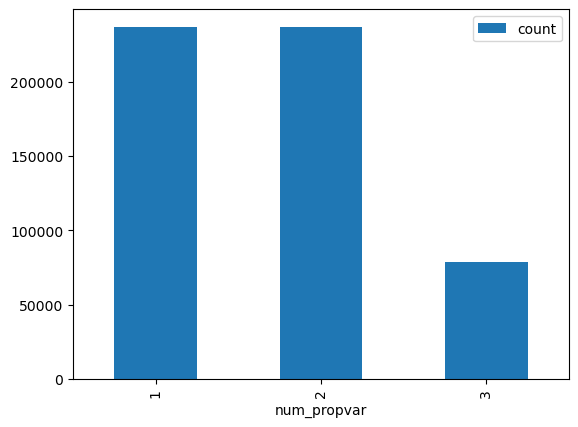

In [12]:
df.groupby("num_propvar").count()[["Aord_size"]].rename(columns={"Aord_size" : "count"}).plot.bar()

<AxesSubplot:xlabel='num_nodes'>

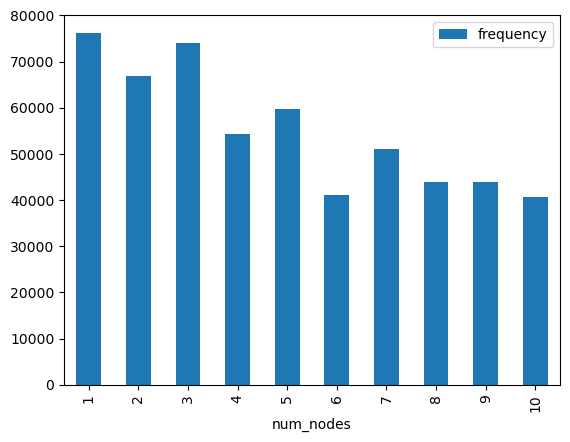

In [13]:
df.groupby("num_nodes").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

<AxesSubplot:xlabel='num_edge'>

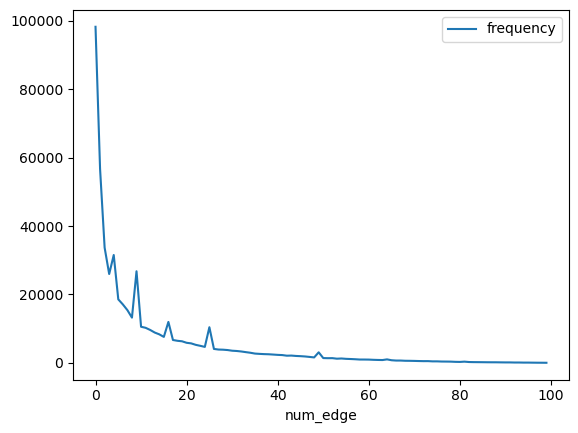

In [14]:
df.groupby("num_edge").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot()

<AxesSubplot:xlabel='Themes_size'>

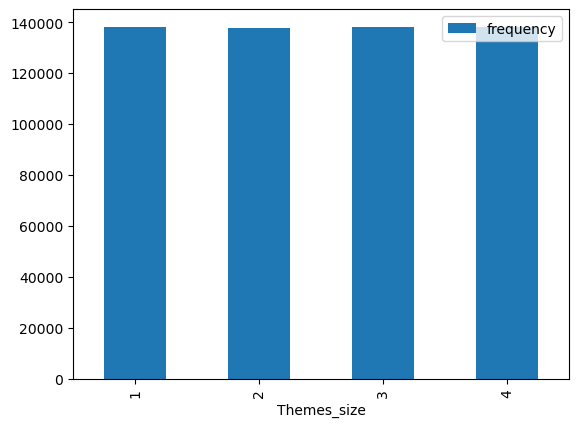

In [15]:
df.groupby("Themes_size").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

<AxesSubplot:xlabel='max_given_themes_num'>

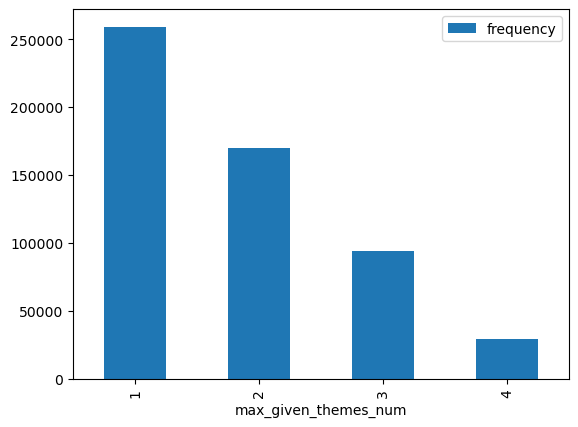

In [16]:
df.groupby("max_given_themes_num").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

<AxesSubplot:xlabel='max_given_logics_num'>

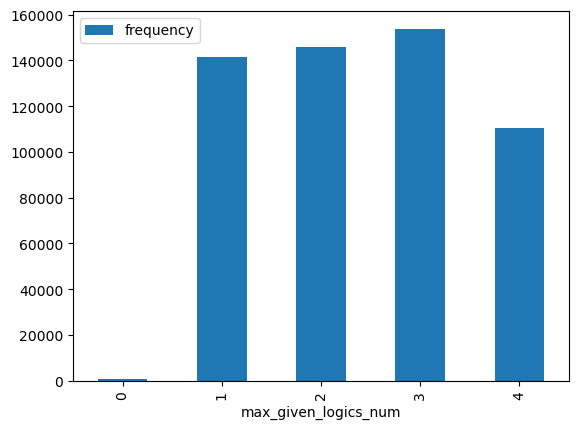

In [17]:
df.groupby("max_given_logics_num").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

In [18]:
def calc_true_ratios(df_target):

    true_ratios = list()
    for i,name in enumerate(constraints_names):
        result = (df_target.groupby(f"{name}_TF").count()[["Aord_size"]].rename(columns={"Aord_size" : "count"}))
        # print(name,result)
        false_n = result.iloc[0,0]
        true_n = result.iloc[1,0]
        assert(false_n + true_n == len(df_target))
        true_ratio  = true_n / (true_n + false_n)
        true_ratios.append( (name,true_ratio))
#     pprint.pprint(true_ratios)
    return true_ratios

print("True percentage calculated per constraint")

result = calc_true_ratios(df)
pprint.pprint(result)

True percentage calculated per constraint
[('tr', 0.4698073627500353),
 ('nnp', 0.6606584520182167),
 ('nsa', 0.37382749238255),
 ('kos', 0.6958291517367061),
 ('nss', 0.2508468865371308),
 ('aass', 0.20510595592204658),
 ('i', 0.011952422186072294),
 ('vi', 0.06797917474303561),
 ('bat', 0.0369767871570336),
 ('pr', 0.17823202698443177),
 ('mat', 0.1116078707008054),
 ('manss', 0.2194695138961853),
 ('ss', 0.19118984388303364),
 ('esr', 0.7864016289205865),
 ('ensr', 0.7810032933470042),
 ('eos', 0.6589356945918822),
 ('das', 0.2452402259330244),
 ('nwci', 0.2919521323425516),
 ('faD', 0.6286669734177261),
 ('faW', 0.6364039838991924)]


In [19]:
def experiment_with_empty_interpretation_removed():
    mask = df["max_given_logics_num"] > 0
    df_not_empty = df[mask]
    print(df.shape)
    print(df_not_empty.shape)
    
    result = calc_true_ratios(df_not_empty)
    pprint.pprint(result)
    
    return result
    
removed_result = experiment_with_empty_interpretation_removed()

result_ratio = dict()

for i in range(len(result)):
        name, r1 = result[i]
        _, r2 = removed_result[i]
        
        result_ratio[name] = (r2-r1)/r1



print("Relative change")
pprint.pprint(sorted(result_ratio.items(),key=lambda x:x[1]))



(552022, 49)
(551441, 49)
[('tr', 0.46925056352356825),
 ('nnp', 0.6603009206787308),
 ('nsa', 0.37364106042169515),
 ('kos', 0.6955086763588489),
 ('nss', 0.2503966879502975),
 ('aass', 0.2049357954885473),
 ('i', 0.01091141210029722),
 ('vi', 0.06699719462281549),
 ('bat', 0.03596214282216955),
 ('pr', 0.17736620962170024),
 ('mat', 0.11067185791408328),
 ('manss', 0.21864714448145858),
 ('ss', 0.19033767891759953),
 ('esr', 0.786176580994159),
 ('ensr', 0.7807725577169634),
 ('eos', 0.658576348149666),
 ('das', 0.24444500862286264),
 ('nwci', 0.2916885033938354),
 ('faD', 0.6282757357541423),
 ('faW', 0.6360208979745793)]
Relative change
[('i', -0.08709616089265344),
 ('bat', -0.02744003502941023),
 ('vi', -0.014445308051061943),
 ('mat', -0.008386619875862962),
 ('pr', -0.004857810222890848),
 ('ss', -0.004457166490263199),
 ('manss', -0.0037470781254644618),
 ('das', -0.003242605519287637),
 ('nss', -0.001794714668569834),
 ('tr', -0.00118516496465236),
 ('nwci', -0.00090298689240

# Visualize by classifying data according to whether or not constraints are met.

In [20]:
def visualizer(constraint_name : str,tf = True) :
    
    mask = df[f"{constraint_name}_TF"]  ^ (not tf)
    plt.title(f"{name} {tf} model: time distribution")
    plt.xlabel("time")
    plt.ylabel("frequency")
    df[mask][f"{constraint_name}_time"].hist()
    


In [21]:
name = "faD"

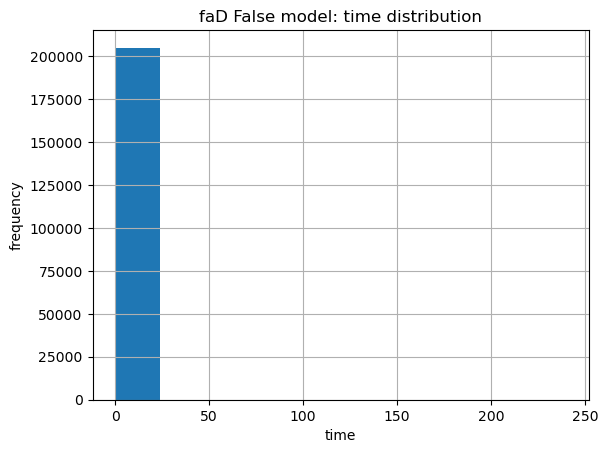

In [22]:
visualizer(name,tf=False)

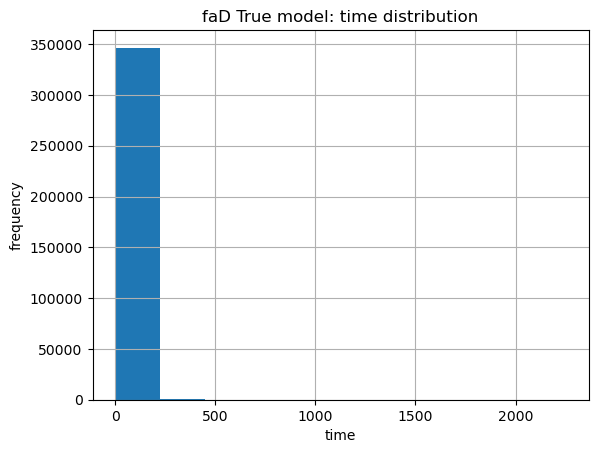

In [23]:
visualizer(name,tf=True)

# Visualization by correlation matrix of computation time

In [24]:
df_TF= df[[f"{name}_TF" for name in constraints_names]]
df_time = df[[f"{name}_time" for name in constraints_names]]

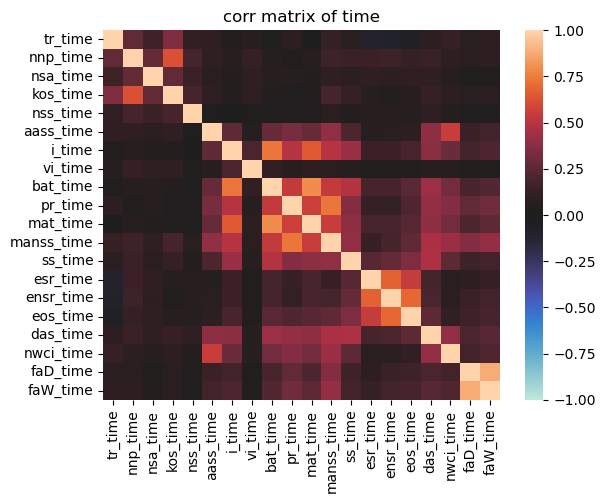

In [25]:
df_time_corr = df_time.corr()

sns.heatmap(df_time_corr,vmax=1,vmin=-1,center=0,annot=False,)
plt.title("corr matrix of time")
plt.plot()
plt.savefig("time_corr.png")
plt.show()

# Find the Cramer's coefficient of associationfor {constraint name}_TF

In [26]:
from scipy.stats import chi2_contingency

def cramersv(col1,col2,bias_correction = False):
    crosstab = np.array(pd.crosstab(col1, col2)).astype(np.float32)
    N = crosstab.sum()
    X,_,_,_ = chi2_contingency(crosstab,correction=False)
    phai = X/N
    
    k,r = crosstab.shape
    assert(k==2 and r==2)
    
    if not bias_correction:
        return np.sqrt(phai /(np.min(np.array([k,r])) - 1))
    
    phai2 = np.max(np.array([0,phai - (k-1) * (r-1) / (N-1)]) )
    k2 = k - (k-1) ** 2 / (N-1)
    r2  = r - (r-1) ** 2 / (N-1)
    
    return np.sqrt(phai2 / (np.min(np.array([k2,r2]))-1) )

print(df_TF.shape)

(552022, 20)


In [27]:
cols = df_TF.columns
cramer_matrix = np.zeros((len(cols),len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cramer_matrix[i][j] = cramersv(df_TF[cols[i]],df_TF[cols[j]])

df_cramer = pd.DataFrame({cols[i] : cramer_matrix[i]  for i in range(len(cols))},index=cols)
df_cramer

,tr_TF,nnp_TF,nsa_TF,kos_TF,nss_TF,aass_TF,i_TF,vi_TF,bat_TF,pr_TF,mat_TF,manss_TF,ss_TF,esr_TF,ensr_TF,eos_TF,das_TF,nwci_TF,faD_TF,faW_TF
tr_TF,1.000000,0.442911,0.356749,0.484052,0.500302,0.491685,0.115772,0.206870,0.169713,0.445268,0.310263,0.207683,0.187697,0.189942,0.321742,0.312835,0.501963,0.516276,0.282449,0.282131
nnp_TF,0.442911,1.000000,0.104002,0.662774,0.160862,0.144434,0.076150,0.102053,0.117890,0.295202,0.214937,0.091135,0.089027,0.232749,0.391899,0.184123,0.166333,0.190073,0.122804,0.123604
nsa_TF,0.356749,0.104002,1.000000,0.158654,0.652115,0.657425,0.057108,0.177412,0.000703,0.158246,0.002218,0.138258,0.140850,0.032673,0.124824,0.065154,0.623071,0.558935,0.336492,0.331912
kos_TF,0.484052,0.662774,0.158654,1.000000,0.247442,0.235422,0.072646,0.153686,0.107353,0.307510,0.197066,0.350371,0.154540,0.121573,0.514945,0.305996,0.258189,0.283819,0.218761,0.217863
nss_TF,0.500302,0.160862,0.652115,0.247442,1.000000,0.821054,0.119741,0.275285,0.015761,0.286743,0.026573,0.285524,0.219987,0.044747,0.194702,0.133934,0.781478,0.763067,0.408295,0.401028
aass_TF,0.491685,0.144434,0.657425,0.235422,0.821054,1.000000,0.082143,0.266522,0.007427,0.255746,0.014710,0.252750,0.194293,0.039213,0.181863,0.121536,0.797501,0.779388,0.375707,0.369590
i_TF,0.115772,0.076150,0.057108,0.072646,0.119741,0.082143,1.000000,0.332285,0.054065,0.229852,0.094529,0.191268,0.181624,0.039629,0.056790,0.071428,0.174779,0.087506,0.082460,0.081125
vi_TF,0.206870,0.102053,0.177412,0.153686,0.275285,0.266522,0.332285,1.000000,0.044981,0.229228,0.055900,0.302545,0.288732,0.060309,0.131595,0.130584,0.288442,0.259885,0.183103,0.179868
bat_TF,0.169713,0.117890,0.000703,0.107353,0.015761,0.007427,0.054065,0.044981,1.000000,0.145860,0.525800,0.026144,0.077714,0.099640,0.101046,0.137351,0.037936,0.024422,0.025047,0.026936
pr_TF,0.445268,0.295202,0.158246,0.307510,0.286743,0.255746,0.229852,0.229228,0.145860,1.000000,0.255416,0.386999,0.203116,0.133724,0.244161,0.266050,0.313332,0.319880,0.223423,0.221476


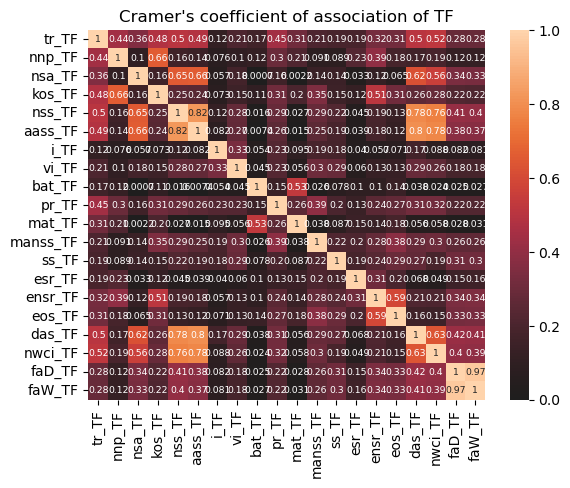

In [28]:
sns.heatmap(df_cramer,vmax=1,vmin=0,center=0,annot=True,annot_kws={"size": 30 / np.sqrt(len(df_TF.corr()))},)
plt.rcParams["figure.figsize"] = (5,5)
plt.title("Cramer's coefficient of association of TF")
plt.plot()
plt.savefig("tf_cramer.png")
plt.show()

In [29]:
cols = df_TF.columns
cramer_matrix_corrected =  np.zeros((len(cols),len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cramer_matrix_corrected[i][j] = cramersv(df_TF[cols[i]],df_TF[cols[j]],bias_correction=True)

df_cramer_corrected = pd.DataFrame({cols[i] : cramer_matrix_corrected[i]  for i in range(len(cols))},index=cols)
df_cramer_corrected

,tr_TF,nnp_TF,nsa_TF,kos_TF,nss_TF,aass_TF,i_TF,vi_TF,bat_TF,pr_TF,mat_TF,manss_TF,ss_TF,esr_TF,ensr_TF,eos_TF,das_TF,nwci_TF,faD_TF,faW_TF
tr_TF,1.000000,0.442909,0.356747,0.484050,0.500301,0.491683,0.115765,0.206866,0.169708,0.445267,0.310261,0.207679,0.187692,0.189938,0.321740,0.312832,0.501962,0.516275,0.282446,0.282128
nnp_TF,0.442909,1.000000,0.103993,0.662774,0.160857,0.144428,0.076138,0.102044,0.117882,0.295200,0.214933,0.091125,0.089017,0.232746,0.391897,0.184118,0.166328,0.190068,0.122797,0.123597
nsa_TF,0.356747,0.103993,1.000000,0.158649,0.652114,0.657424,0.057092,0.177407,0.000000,0.158241,0.001763,0.138251,0.140844,0.032645,0.124817,0.065140,0.623070,0.558934,0.336490,0.331910
kos_TF,0.484050,0.662774,0.158649,1.000000,0.247439,0.235419,0.072634,0.153681,0.107345,0.307507,0.197061,0.350369,0.154535,0.121566,0.514944,0.305994,0.258185,0.283816,0.218757,0.217859
nss_TF,0.500301,0.160857,0.652114,0.247439,1.000000,0.821053,0.119734,0.275282,0.015703,0.286740,0.026539,0.285521,0.219983,0.044726,0.194698,0.133928,0.781478,0.763067,0.408293,0.401026
aass_TF,0.491683,0.144428,0.657424,0.235419,0.821053,1.000000,0.082132,0.266519,0.007304,0.255742,0.014648,0.252746,0.194288,0.039190,0.181858,0.121528,0.797501,0.779387,0.375705,0.369588
i_TF,0.115765,0.076138,0.057092,0.072634,0.119734,0.082132,1.000000,0.332283,0.054048,0.229848,0.094519,0.191263,0.181620,0.039606,0.056774,0.071416,0.174774,0.087496,0.082449,0.081114
vi_TF,0.206866,0.102044,0.177407,0.153681,0.275282,0.266519,0.332283,1.000000,0.044960,0.229224,0.055884,0.302542,0.288729,0.060294,0.131588,0.130578,0.288439,0.259882,0.183098,0.179863
bat_TF,0.169708,0.117882,0.000000,0.107345,0.015703,0.007304,0.054048,0.044960,1.000000,0.145854,0.525799,0.026110,0.077703,0.099631,0.101037,0.137344,0.037912,0.024385,0.025011,0.026902
pr_TF,0.445267,0.295200,0.158241,0.307507,0.286740,0.255742,0.229848,0.229224,0.145854,1.000000,0.255413,0.386997,0.203112,0.133717,0.244157,0.266046,0.313330,0.319877,0.223419,0.221472


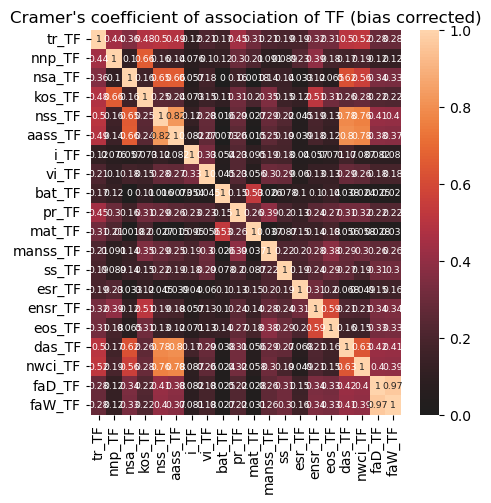

In [30]:
sns.heatmap(df_cramer_corrected,vmax=1,vmin=0,center=0,annot=True,annot_kws={"size": 30 / np.sqrt(len(df_TF.corr()))},)
plt.rcParams["figure.figsize"] = (5,5)
plt.title("Cramer's coefficient of association of TF (bias corrected)")
plt.plot()
plt.savefig("tf_cramer.png")
plt.show()

In [31]:
# cross tabulation
col1 = "esr_TF"
col2 = "manss_TF"
pd.crosstab(df_TF[col1],df_TF[col2])

manss_TF,0,1
esr_TF,,
0,72987,44924
1,357883,76228


(552022, 20)
             tr_TF    nnp_TF    nsa_TF    kos_TF    nss_TF   aass_TF  \
tr_TF     1.000000  0.442911  0.356749  0.484052  0.500302  0.491685   
nnp_TF    0.442911  1.000000  0.104002  0.662774  0.160862  0.144434   
nsa_TF    0.356749  0.104002  1.000000  0.158654  0.652115  0.657425   
kos_TF    0.484052  0.662774  0.158654  1.000000  0.247442  0.235422   
nss_TF    0.500302  0.160862  0.652115  0.247442  1.000000  0.821054   
aass_TF   0.491685  0.144434  0.657425  0.235422  0.821054  1.000000   
i_TF      0.115772  0.076150  0.057108  0.072646  0.119741  0.082143   
vi_TF     0.206870  0.102053  0.177412  0.153686  0.275285  0.266522   
bat_TF    0.169713  0.117890  0.000703  0.107353  0.015761  0.007427   
pr_TF     0.445268  0.295202  0.158246  0.307510  0.286743  0.255746   
mat_TF    0.310263  0.214937 -0.002218  0.197066  0.026573  0.014710   
manss_TF  0.207683  0.091135  0.138258  0.350371  0.285524  0.252750   
ss_TF     0.187697  0.089027  0.140850  0.154540  0

<AxesSubplot:>

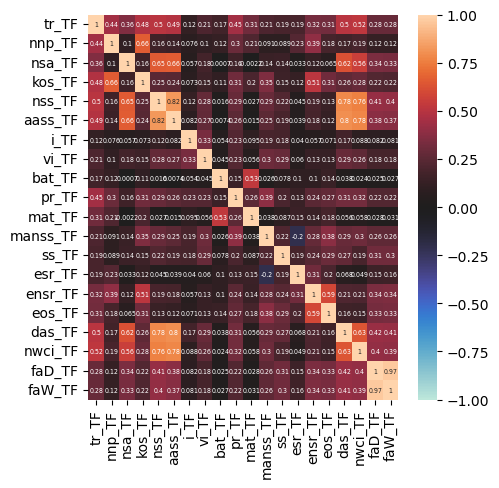

In [32]:
#ファイ係数
print(df_TF.shape)
print(df_TF.corr())
sns.heatmap(df_TF.corr(),vmax=1,vmin=-1,center=0,annot=True,annot_kws={"size": 20 / np.sqrt(len(df_TF.corr()))},)

# Turn a dataframe into an image

In [33]:
def df2image(df_saved,name = "output.png"):
    import dataframe_image as dfi
    print("saving")
    dfi.export(df_saved,name,max_cols = -1)
    return

# Find out the computation time for the data computed by subPC.
(The difference in PC specs is taken into account.)

In [34]:
def group_by_describe(col_name ,df):
    df2image(df[[c + "_time" for c in constraints_names] + [col_name]].groupby(col_name).describe(),f"group_by_{col_name}.png")
    return

#  time consuming
# for col in model_info:
#     if col == "num_edges": continue
#     print(col,"start")
#     group_by_describe(col,df)


df_sub = pd.read_csv("./time_data_subPC.csv")
print(df_sub.shape)

for name in constraints_names:
    df[f"{name}_TF"] = df[f"{name}_TF"] * 1

df_sub = df_sub[df_sub["Themes_size"] < 4]
df_sub = df_sub[df_sub["num_nodes"] % 3 == 0]

print(df_sub.shape)
df_sub.describe()

(235556, 49)
(51042, 49)


,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,nnp_time,nsa_time,kos_time,nss_time,aass_time,i_time,vi_time,bat_time,pr_time,mat_time,manss_time,ss_time,esr_time,ensr_time,eos_time,das_time,nwci_time,faD_time,faW_time
count,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,5.104200e+04,5.104200e+04,5.104200e+04,51042.000000,51042.000000,51042.000000,51042.000000,5.104200e+04,5.104200e+04,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,5.104200e+04,5.104200e+04,51042.000000,51042.000000
mean,3.067454,2.070706,5.248384,2.180929,3.067454,13.511011,1.687356,2.001117,2.428902,9.038788e-06,5.261945e-06,2.220961e-06,0.000003,0.000004,0.001276,0.001087,1.527930e-06,1.651226e-03,0.004370,0.001976,0.003774,0.007346,0.000055,0.000051,0.000061,1.747217e-03,4.677485e-03,2.891481,1.111731
std,2.448053,0.862524,2.499188,1.587875,2.448053,15.632677,0.776898,0.815243,1.076368,8.903521e-06,2.829867e-06,6.516039e-07,0.000001,0.000005,0.003957,0.001792,6.216850e-07,2.071954e-03,0.009172,0.003594,0.007843,0.012181,0.000058,0.000055,0.000073,3.616615e-03,1.433254e-02,18.748379,6.069872
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,7.152557e-07,9.536743e-07,7.152557e-07,0.000000,0.000000,0.000000,0.000002,0.000000e+00,9.536743e-07,0.000007,0.000004,0.000005,0.000004,0.000006,0.000005,0.000005,7.152557e-07,7.152557e-07,0.000186,0.000005
25%,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,4.768372e-06,4.053116e-06,1.907349e-06,0.000001,0.000002,0.000031,0.000004,9.536743e-07,1.952648e-04,0.000117,0.000025,0.000034,0.000245,0.000013,0.000011,0.000013,8.201599e-05,2.408028e-05,0.000962,0.000514
50%,3.000000,2.000000,3.000000,2.000000,3.000000,9.000000,1.000000,2.000000,2.000000,6.198883e-06,5.006790e-06,2.145767e-06,0.000003,0.000002,0.000098,0.000218,1.668930e-06,8.468628e-04,0.000771,0.000431,0.000583,0.002056,0.000028,0.000028,0.000034,2.288818e-04,1.499653e-04,0.009986,0.009276
75%,5.000000,3.000000,9.000000,3.000000,5.000000,18.000000,2.000000,3.000000,3.000000,1.001358e-05,6.198883e-06,2.861023e-06,0.000003,0.000006,0.000472,0.001461,2.145767e-06,2.217829e-03,0.004098,0.002156,0.003536,0.008885,0.000086,0.000073,0.000073,1.481235e-03,2.489984e-03,0.236755,0.195262
max,9.000000,3.000000,9.000000,7.000000,9.000000,81.000000,3.000000,3.000000,4.000000,1.249313e-04,4.539490e-04,1.692772e-05,0.000012,0.000127,0.139507,0.016219,4.506111e-05,3.908873e-02,0.178279,0.046546,0.093253,0.178075,0.000349,0.000485,0.000684,5.602098e-02,7.907732e-01,748.273161,233.344408


In [35]:
def describe_projection_by_constraints(df,constraints):
    df_reduced = df.copy()
    for c in ["count","%","std","min"]:
        for col in df_reduced.columns:
            if c in col[1] or (col[0][0:col[0].find("_")] ) not in constraints:
                df_reduced = df_reduced.drop(col,axis=1)
    return df_reduced

In [36]:
pd.options.display.float_format = '{:.2e}'.format

constraints = [
    
#     'tr', 
#     'nnp',
#     'nsa', 
#     'kos',
#     'nss',
    
#     'aass',
#     'i',
#     'vi',
#     'bat',
#     'pr',
#     'mat',
#     'manss',
#     'ss',
    
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]
    

def groupby_describe_TF(df,group=["Themes_size"]):
    describe_tab_TF = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    return describe_tab_TF

 
describe_tab_TF = groupby_describe_TF(df_sub,["num_nodes","Themes_size","num_propvar"])

projected = describe_projection_by_constraints(describe_tab_TF,constraints)
tex = projected.to_latex()

print(tex)

projected

\begin{tabular}{lllrrrrrrrrrrrrrr}
\toprule
  &   &   & \multicolumn{2}{l}{esr\_time} & \multicolumn{2}{l}{ensr\_time} & \multicolumn{2}{l}{eos\_time} & \multicolumn{2}{l}{das\_time} & \multicolumn{2}{l}{nwci\_time} & \multicolumn{2}{l}{faD\_time} & \multicolumn{2}{l}{faW\_time} \\
  &   &   &     mean &      max &      mean &      max &     mean &      max &     mean &      max &      mean &      max &     mean &      max &     mean &      max \\
num\_nodes & Themes\_size & num\_propvar &          &          &           &          &          &          &          &          &           &          &          &          &          &          \\
\midrule
3 & 1 & 1 & 1.11e-05 & 2.12e-05 &  8.82e-06 & 1.79e-05 & 9.79e-06 & 3.00e-05 & 1.31e-04 & 1.12e-03 &  4.05e-04 & 5.40e-03 & 4.92e-03 & 8.41e-02 & 4.21e-03 & 8.40e-02 \\
  &   & 2 & 1.22e-05 & 2.22e-05 &  9.38e-06 & 1.81e-05 & 1.06e-05 & 2.31e-05 & 6.15e-04 & 1.09e-02 &  2.52e-03 & 3.82e-02 & 9.68e-02 & 2.48e+00 & 8.47e-02 & 2.48e+00 \\
 

esr_time          ensr_time           \
                                      mean      max      mean      max   
num_nodes Themes_size num_propvar                                        
3         1           1           1.11e-05 2.12e-05  8.82e-06 1.79e-05   
                      2           1.22e-05 2.22e-05  9.38e-06 1.81e-05   
                      3           1.28e-05 3.19e-05  9.56e-06 2.22e-05   
          2           1           2.42e-05 5.20e-05  2.12e-05 5.29e-05   
                      2           2.80e-05 6.60e-05  2.56e-05 5.70e-05   
                      3           3.09e-05 7.58e-05  2.71e-05 7.39e-05   
          3           1           5.33e-05 2.42e-04  6.82e-05 1.59e-04   
                      2           9.87e-05 2.77e-04  7.71e-05 2.05e-04   
                      3           1.56e-04 3.29e-04  8.33e-05 2.28e-04   
6         1           1           1.10e-05 2.31e-05  1.02e-05 2.10e-05   
                      2           1.20e-05 2.17e-05  1.12e-05 2.29e-05   
                      3           1.28e-05 2.91e-05  1.17e-05 3.03e-05   
          2           1           2.80e-05 6.29e-05  2.54e-05 7.08e-05   
                      2           3.27e-05 7.30e-05  3.53e-05 7.89e-05   
                      3           3.62e-05 8.39e-05  4.02e-05 1.11e-04   
          3           1           7.08e-05 2.16e-04  5.34e-05 2.27e-04   
                      2           1.04e-04 2.70e-04  1.03e-04 2.70e-04   
                      3           1.33e-04 3.14e-04  1.53e-04 3.52e-04   
9         1           1           1.25e-05 2.38e-05  1.31e-05 3.29e-05   
                      2           1.35e-05 2.41e-05  1.48e-05 2.98e-05   
                      3           1.46e-05 4.20e-05  1.57e-05 3.58e-05   
          2           1           3.06e-05 1.48e-04  2.96e-05 2.98e-04   
                      2           3.63e-05 7.89e-05  4.46e-05 1.02e-04   
                      3           4.07e-05 9.13e-05  5.39e-05 1.31e-04   
          3           1           8.08e-05 2.18e-04  5.81e-05 3.01e-04   
                      2           1.17e-04 2.93e-04  1.26e-04 4.49e-04   
                      3           1.45e-04 3.49e-04  2.09e-04 4.85e-04   

                                  eos_time          das_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1           9.79e-06 3.00e-05 1.31e-04 1.12e-03   
                      2           1.06e-05 2.31e-05 6.15e-04 1.09e-02   
                      3           1.09e-05 2.31e-05 2.77e-03 4.90e-02   
          2           1           2.38e-05 6.60e-05 1.36e-04 1.40e-03   
                      2           3.37e-05 7.01e-05 6.94e-04 7.08e-03   
                      3           4.00e-05 8.30e-05 3.27e-03 3.50e-02   
          3           1           5.83e-05 1.92e-04 1.63e-04 1.47e-03   
                      2           7.80e-05 2.47e-04 8.53e-04 1.20e-02   
                      3           9.84e-05 2.87e-04 4.03e-03 5.60e-02   
6         1           1           1.54e-05 3.31e-05 1.64e-04 1.63e-03   
                      2           1.80e-05 3.41e-05 8.81e-04 7.11e-03   
                      3           1.92e-05 4.41e-05 3.84e-03 4.84e-02   
          2           1           2.95e-05 9.42e-05 1.74e-04 1.49e-03   
                      2           4.91e-05 1.19e-04 1.00e-03 8.52e-03   
                      3           6.27e-05 1.34e-04 5.15e-03 3.56e-02   
          3           1           4.77e-05 3.28e-04 1.90e-04 1.51e-03   
                      2           1.16e-04 3.78e-04 1.05e-03 9.37e-03   
                      3           2.10e-04 4.81e-04 5.10e-03 4.18e-02   
9         1           1           1.89e-05 4.20e-05 1.81e-04 1.41e-03   
                      2           2.22e-05 4.79e-05 9.59e-04 9.43e-03   
                      3           2.43e-05 5.20e-05 4.56e-03 3.34e-02   
          2           1           3.80e-05 2.41e-04 1.93e-04 

# Classify data by TF for each constraint and then tabulate computation time.

In [37]:
def groupby_describe_T(df,group=["Themes_size","num_propvar"]):
    describe_tab_T = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    
    drop_col = ["count","min","std","25%","50%","75%"]
    
    for col in describe_tab_T.columns:
        if col[1] in drop_col:
            describe_tab_T = describe_tab_T.drop(col,axis=1)
    

    for col in describe_tab_T.columns:
        print(col)
        name = col[0][:col[0].find("_")]
        kind = col[1]
        print(name)
        for row in describe_tab_T.index:
            

            if len(group) > 1:
                row = tuple(row)
            
            df_limited = df[df[name + "_TF"] > 0.5].copy()
            
            for i in range(len(group)):
                if len(group) == 1:
                    df_limited = df_limited[df_limited[group[i]]== row]
                else:
                    df_limited = df_limited[df_limited[group[i]]== row[i]]

            df_limited = df_limited.describe()
            describe_tab_T.loc[row,col] = df_limited.loc[kind,name + "_time"]

    return describe_tab_T
    
print(df_sub.shape)
describe_tab_T = groupby_describe_T(df_sub,["num_nodes","Themes_size","num_propvar"])

# describe_tab_T = describe_tab.copy()

# print(describe_tab_T.index)

# for col in describe_tab_T.columns:
#     print(col)
#     name = col[0][:col[0].find("_")]
#     kind = col[1]
#     print(name)
#     for row in describe_tab_T.index:
# #         print(row)
        
#         df_limited = df_sub[df_sub[name + "_TF"] > 0.5]
#         df_limited = df_limited[df_limited["Themes_size"] == row]
        
#         df_limited = df_limited.describe()
        
# #         print(df_limited)
        
#         describe_tab_T.loc[row,col] = df_limited.loc[kind,name + "_time"]
    
# describe_tab_T

(51042, 49)
('tr_time', 'mean')
tr
('tr_time', 'max')
tr
('nnp_time', 'mean')
nnp
('nnp_time', 'max')
nnp
('nsa_time', 'mean')
nsa
('nsa_time', 'max')
nsa
('kos_time', 'mean')
kos
('kos_time', 'max')
kos
('nss_time', 'mean')
nss
('nss_time', 'max')
nss
('aass_time', 'mean')
aass
('aass_time', 'max')
aass
('i_time', 'mean')
i
('i_time', 'max')
i
('vi_time', 'mean')
vi
('vi_time', 'max')
vi
('bat_time', 'mean')
bat
('bat_time', 'max')
bat
('pr_time', 'mean')
pr
('pr_time', 'max')
pr
('mat_time', 'mean')
mat
('mat_time', 'max')
mat
('manss_time', 'mean')
manss
('manss_time', 'max')
manss
('ss_time', 'mean')
ss
('ss_time', 'max')
ss
('esr_time', 'mean')
esr
('esr_time', 'max')
esr
('ensr_time', 'mean')
ensr
('ensr_time', 'max')
ensr
('eos_time', 'mean')
eos
('eos_time', 'max')
eos
('das_time', 'mean')
das
('das_time', 'max')
das
('nwci_time', 'mean')
nwci
('nwci_time', 'max')
nwci
('faD_time', 'mean')
faD
('faD_time', 'max')
faD
('faW_time', 'mean')
faW
('faW_time', 'max')
faW


In [38]:
pd.options.display.float_format = '{:.2e}'.format

constraints = [
    
#     'tr', 
#     'nnp',
#     'nsa', 
#     'kos',
#     'nss',
    
#     'aass',
#     'i',
#     'vi',
#     'bat',
#     'pr',
#     'mat',
#     'manss',
#     'ss',
    
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]

describe_tab_Treduced = describe_projection_by_constraints(describe_tab_T,constraints)
s = describe_tab_Treduced.to_latex()

print(s)
describe_tab_Treduced

\begin{tabular}{lllrrrrrrrrrrrrrr}
\toprule
  &   &   & \multicolumn{2}{l}{esr\_time} & \multicolumn{2}{l}{ensr\_time} & \multicolumn{2}{l}{eos\_time} & \multicolumn{2}{l}{das\_time} & \multicolumn{2}{l}{nwci\_time} & \multicolumn{2}{l}{faD\_time} & \multicolumn{2}{l}{faW\_time} \\
  &   &   &     mean &      max &      mean &      max &     mean &      max &     mean &      max &      mean &      max &     mean &      max &     mean &      max \\
num\_nodes & Themes\_size & num\_propvar &          &          &           &          &          &          &          &          &           &          &          &          &          &          \\
\midrule
3 & 1 & 1 & 1.14e-05 & 2.12e-05 &  9.08e-06 & 1.79e-05 & 1.03e-05 & 3.00e-05 & 3.09e-05 & 9.09e-04 &  7.25e-04 & 5.40e-03 & 6.37e-03 & 8.41e-02 & 5.24e-03 & 8.40e-02 \\
  &   & 2 & 1.22e-05 & 2.22e-05 &  9.41e-06 & 1.81e-05 & 1.07e-05 & 2.31e-05 & 7.51e-05 & 6.15e-03 &  5.01e-03 & 3.82e-02 & 1.04e-01 & 2.48e+00 & 9.09e-02 & 2.48e+00 \\
 

esr_time          ensr_time           \
                                      mean      max      mean      max   
num_nodes Themes_size num_propvar                                        
3         1           1           1.14e-05 2.12e-05  9.08e-06 1.79e-05   
                      2           1.22e-05 2.22e-05  9.41e-06 1.81e-05   
                      3           1.28e-05 3.19e-05  9.56e-06 2.22e-05   
          2           1           2.61e-05 5.20e-05  2.39e-05 5.29e-05   
                      2           2.85e-05 6.60e-05  2.61e-05 5.70e-05   
                      3           3.09e-05 7.58e-05  2.71e-05 7.39e-05   
          3           1           9.76e-05 2.42e-04  7.51e-05 1.59e-04   
                      2           1.26e-04 2.77e-04  7.99e-05 2.05e-04   
                      3           1.56e-04 3.29e-04  8.33e-05 2.28e-04   
6         1           1           1.11e-05 2.31e-05  1.06e-05 2.10e-05   
                      2           1.20e-05 2.17e-05  1.13e-05 2.29e-05   
                      3           1.28e-05 2.91e-05  1.17e-05 3.03e-05   
          2           1           3.07e-05 6.29e-05  3.32e-05 7.08e-05   
                      2           3.33e-05 7.30e-05  3.71e-05 7.89e-05   
                      3           3.62e-05 8.39e-05  4.02e-05 1.11e-04   
          3           1           9.73e-05 2.16e-04  1.03e-04 2.27e-04   
                      2           1.15e-04 2.70e-04  1.28e-04 2.70e-04   
                      3           1.33e-04 3.14e-04  1.54e-04 3.52e-04   
9         1           1           1.27e-05 2.38e-05  1.40e-05 3.29e-05   
                      2           1.35e-05 2.41e-05  1.49e-05 2.98e-05   
                      3           1.46e-05 4.20e-05  1.57e-05 3.58e-05   
          2           1           3.38e-05 6.29e-05  4.08e-05 9.51e-05   
                      2           3.72e-05 7.89e-05  4.81e-05 1.02e-04   
                      3           4.07e-05 9.13e-05  5.39e-05 1.31e-04   
          3           1           1.12e-04 2.18e-04  1.32e-04 3.01e-04   
                      2           1.28e-04 2.93e-04  1.71e-04 4.49e-04   
                      3           1.45e-04 3.49e-04  2.09e-04 4.85e-04   

                                  eos_time          das_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1           1.03e-05 3.00e-05 3.09e-05 9.09e-04   
                      2           1.07e-05 2.31e-05 7.51e-05 6.15e-03   
                      3           1.09e-05 2.31e-05 2.76e-04 1.34e-02   
          2           1           3.39e-05 6.60e-05 3.28e-05 6.70e-04   
                      2           3.67e-05 7.01e-05 8.16e-05 3.09e-03   
                      3           4.01e-05 8.30e-05 6.04e-04 3.06e-02   
          3           1           7.35e-05 1.92e-04 4.05e-05 1.11e-03   
                      2           8.60e-05 2.47e-04 1.18e-04 4.69e-03   
                      3           9.84e-05 2.87e-04 5.92e-04 2.22e-02   
6         1           1           1.73e-05 3.31e-05 5.63e-05 7.61e-04   
                      2           1.84e-05 3.41e-05 7.17e-05 1.95e-03   
                      3           1.92e-05 4.41e-05 4.06e-04 1.23e-02   
          2           1           5.00e-05 9.42e-05 2.21e-05 5.15e-04   
                      2           5.63e-05 1.19e-04 1.78e-04 4.88e-03   
                      3           6.28e-05 1.34e-04 6.92e-04 1.47e-02   
          3           1           1.52e-04 3.28e-04 2.17e-05 2.95e-04   
                      2           1.74e-04 3.78e-04 9.75e-05 3.18e-03   
                      3           2.10e-04 4.81e-04 7.68e-04 1.99e-02   
9         1           1           2.17e-05 4.20e-05 4.19e-05 4.60e-04   
                      2           2.27e-05 4.79e-05 7.78e-05 1.26e-03   
                      3           2.43e-05 5.20e-05 4.90e-04 8.44e-03   
          2           1           6.86e-05 1.33e-04 5.17e-05 

In [39]:
def groupby_describe_F(df,group=["Themes_size","num_propvar"]):
    describe_tab_F = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    
    drop_col = ["count","min","std","25%","50%","75%"]
    
    for col in describe_tab_F.columns:
        if col[1] in drop_col:
            describe_tab_F = describe_tab_F.drop(col,axis=1)
    

    for col in describe_tab_F.columns:
        print(col)
        name = col[0][:col[0].find("_")]
        kind = col[1]
        print(name)
        for row in describe_tab_F.index:
            

            if len(group) > 1:
                row = tuple(row)
            
            df_limited = df[df[name + "_TF"] < 0.5].copy()
            
            for i in range(len(group)):
                if len(group) == 1:
                    df_limited = df_limited[df_limited[group[i]]== row]
                else:
                    df_limited = df_limited[df_limited[group[i]]== row[i]]

            df_limited = df_limited.describe()
            describe_tab_F.loc[row,col] = df_limited.loc[kind,name + "_time"]

    return describe_tab_F
    
print(df_sub.shape)
describe_tab_F = groupby_describe_F(df_sub,["num_nodes","Themes_size","num_propvar"])


# describe_tab_F = describe_tab.copy()

# print(describe_tab_F.index)

# for col in describe_tab_F.columns:
#     print(col)
#     name = col[0][:col[0].find("_")]
#     kind = col[1]
#     print(name)
#     for row in describe_tab_F.index:
# #         print(row)
        
#         df_limited = df_sub[df_sub[name + "_TF"] < 0.5]
#         df_limited = df_limited[df_limited["Themes_size"] == row]
        
#         df_limited = df_limited.describe()
        
# #         print(df_limited)
        
#         describe_tab_F.loc[row,col] = df_limited.loc[kind,name + "_time"]
    
# describe_tab_F

(51042, 49)
('tr_time', 'mean')
tr
('tr_time', 'max')
tr
('nnp_time', 'mean')
nnp
('nnp_time', 'max')
nnp
('nsa_time', 'mean')
nsa
('nsa_time', 'max')
nsa
('kos_time', 'mean')
kos
('kos_time', 'max')
kos
('nss_time', 'mean')
nss
('nss_time', 'max')
nss
('aass_time', 'mean')
aass
('aass_time', 'max')
aass
('i_time', 'mean')
i
('i_time', 'max')
i
('vi_time', 'mean')
vi
('vi_time', 'max')
vi
('bat_time', 'mean')
bat
('bat_time', 'max')
bat
('pr_time', 'mean')
pr
('pr_time', 'max')
pr
('mat_time', 'mean')
mat
('mat_time', 'max')
mat
('manss_time', 'mean')
manss
('manss_time', 'max')
manss
('ss_time', 'mean')
ss
('ss_time', 'max')
ss
('esr_time', 'mean')
esr
('esr_time', 'max')
esr
('ensr_time', 'mean')
ensr
('ensr_time', 'max')
ensr
('eos_time', 'mean')
eos
('eos_time', 'max')
eos
('das_time', 'mean')
das
('das_time', 'max')
das
('nwci_time', 'mean')
nwci
('nwci_time', 'max')
nwci
('faD_time', 'mean')
faD
('faD_time', 'max')
faD
('faW_time', 'mean')
faW
('faW_time', 'max')
faW


In [40]:
pd.options.display.float_format = '{:.2e}'.format

cols = [
    
    'tr', 
    'nnp',
    'nsa', 
    'kos',
    'nss',
    
#     'aass',
#     'i',
#     'vi',
#     'bat',
#     'pr',
#     'mat',
#     'manss',
#     'ss',
    
#     'esr',
#     'ensr',
#     'eos',
#     'das',
#     'nwci',
#     'faD',
#     'faW',
]

describe_tab_Freduced =  describe_projection_by_constraints(describe_tab_F,cols)
s = describe_tab_Freduced.to_latex()

print(s)
describe_tab_Freduced

\begin{tabular}{lllrrrrrrrrrr}
\toprule
  &   &   & \multicolumn{2}{l}{tr\_time} & \multicolumn{2}{l}{nnp\_time} & \multicolumn{2}{l}{nsa\_time} & \multicolumn{2}{l}{kos\_time} & \multicolumn{2}{l}{nss\_time} \\
  &   &   &     mean &      max &     mean &      max &     mean &      max &     mean &      max &     mean &      max \\
num\_nodes & Themes\_size & num\_propvar &          &          &          &          &          &          &          &          &          &          \\
\midrule
3 & 1 & 1 &      NaN &      NaN &      NaN &      NaN & 2.04e-06 & 1.00e-05 &      NaN &      NaN & 3.71e-06 & 3.48e-05 \\
  &   & 2 &      NaN &      NaN &      NaN &      NaN & 2.06e-06 & 4.05e-06 &      NaN &      NaN & 3.62e-06 & 2.69e-05 \\
  &   & 3 &      NaN &      NaN &      NaN &      NaN & 2.08e-06 & 7.87e-06 &      NaN &      NaN & 3.59e-06 & 2.29e-05 \\
  & 2 & 1 & 5.37e-06 & 1.72e-05 & 4.42e-06 & 8.82e-06 & 2.10e-06 & 5.01e-06 & 2.75e-06 & 7.87e-06 & 3.45e-06 & 2.29e-05 \\
  &   & 2 

tr_time          nnp_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1                NaN      NaN      NaN      NaN   
                      2                NaN      NaN      NaN      NaN   
                      3                NaN      NaN      NaN      NaN   
          2           1           5.37e-06 1.72e-05 4.42e-06 8.82e-06   
                      2           5.51e-06 1.31e-05 4.45e-06 7.87e-06   
                      3           5.94e-06 1.53e-05 4.58e-06 8.11e-06   
          3           1           5.47e-06 1.79e-05 3.98e-06 8.82e-06   
                      2           5.61e-06 1.69e-05 4.06e-06 1.00e-05   
                      3           6.18e-06 2.10e-05 4.25e-06 1.19e-05   
6         1           1                NaN      NaN      NaN      NaN   
                      2                NaN      NaN      NaN      NaN   
                      3                NaN      NaN      NaN      NaN   
          2           1           6.56e-06 3.50e-05 5.80e-06 1.00e-05   
                      2           6.83e-06 2.60e-05 5.87e-06 1.10e-05   
                      3           7.47e-06 4.20e-05 6.12e-06 1.19e-05   
          3           1           6.06e-06 4.01e-05 6.10e-06 1.19e-05   
                      2           6.26e-06 3.50e-05 6.36e-06 1.17e-05   
                      3           7.19e-06 3.41e-05 6.76e-06 1.60e-05   
9         1           1                NaN      NaN      NaN      NaN   
                      2                NaN      NaN      NaN      NaN   
                      3                NaN      NaN      NaN      NaN   
          2           1           7.24e-06 1.25e-04 7.34e-06 4.54e-04   
                      2           7.27e-06 4.01e-05 6.95e-06 1.50e-05   
                      3           8.29e-06 5.39e-05 7.50e-06 1.60e-05   
          3           1           6.45e-06 3.89e-05 7.11e-06 1.60e-05   
                      2           6.61e-06 3.39e-05 7.34e-06 1.50e-05   
                      3           7.75e-06 4.29e-05 8.23e-06 2.69e-05   

                                  nsa_time          kos_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1           2.04e-06 1.00e-05      NaN      NaN   
                      2           2.06e-06 4.05e-06      NaN      NaN   
                      3           2.08e-06 7.87e-06      NaN      NaN   
          2           1           2.10e-06 5.01e-06 2.75e-06 7.87e-06   
                      2           2.10e-06 4.05e-06 2.74e-06 5.25e-06   
                      3           2.16e-06 6.20e-06 2.79e-06 5.25e-06   
          3           1           2.04e-06 6.20e-06 2.80e-06 5.96e-06   
                      2           2.07e-06 6.91e-06 2.79e-06 5.01e-06   
                      3           2.16e-06 7.39e-06 2.99e-06 7.15e-06   
6         1           1           2.19e-06 4.05e-06      NaN      NaN   
                      2           2.21e-06 4.05e-06      NaN      NaN   
                      3           2.27e-06 5.72e-06      NaN      NaN   
          2           1           2.23e-06 6.91e-06 3.20e-06 6.20e-06   
                      2           2.27e-06 8.34e-06 3.23e-06 7.15e-06   
                      3           2.35e-06 6.91e-06 3.33e-06 6.20e-06   
          3           1           2.24e-06 5.96e-06 3.06e-06 6.91e-06   
                      2           2.27e-06 5.25e-06 3.10e-06 6.91e-06   
                      3           2.50e-06 5.96e-06 3.35e-06 8.11e-06   
9         1           1           2.30e-06 6.91e-06      NaN      NaN   
                      2           2.26e-06 4.29e-06      NaN      NaN   
                      3           2.35e-06 5.25e-06      NaN      NaN   
          2           1           2.32e-06 7.87e-06 3.55e-06 1.10e-05   
                   

In [41]:
def groupby_describe_TF(df,group=["Themes_size","num_propvar"]):
    describe_tab_TF = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    
    drop_col = ["count","min","std","25%","50%","75%"]
    
    for col in describe_tab_TF.columns:
        if col[1] in drop_col:
            describe_tab_TF = describe_tab_TF.drop(col,axis=1)
    

    for col in describe_tab_TF.columns:
        print(col)
        name = col[0][:col[0].find("_")]
        kind = col[1]
        print(name)
        for row in describe_tab_TF.index:
            

            if len(group) > 1:
                row = tuple(row)
            
            df_limited = df[df[name + "_TF"] > -1.0].copy()
            
            for i in range(len(group)):
                if len(group) == 1:
                    df_limited = df_limited[df_limited[group[i]]== row]
                else:
                    df_limited = df_limited[df_limited[group[i]]== row[i]]

            df_limited = df_limited.describe()
            describe_tab_TF.loc[row,col] = df_limited.loc[kind,name + "_time"]

    return describe_tab_TF
    
print(df_sub.shape)
describe_tab_TF = groupby_describe_TF(df_sub,["num_nodes","Themes_size","num_propvar"])

(51042, 49)
('tr_time', 'mean')
tr
('tr_time', 'max')
tr
('nnp_time', 'mean')
nnp
('nnp_time', 'max')
nnp
('nsa_time', 'mean')
nsa
('nsa_time', 'max')
nsa
('kos_time', 'mean')
kos
('kos_time', 'max')
kos
('nss_time', 'mean')
nss
('nss_time', 'max')
nss
('aass_time', 'mean')
aass
('aass_time', 'max')
aass
('i_time', 'mean')
i
('i_time', 'max')
i
('vi_time', 'mean')
vi
('vi_time', 'max')
vi
('bat_time', 'mean')
bat
('bat_time', 'max')
bat
('pr_time', 'mean')
pr
('pr_time', 'max')
pr
('mat_time', 'mean')
mat
('mat_time', 'max')
mat
('manss_time', 'mean')
manss
('manss_time', 'max')
manss
('ss_time', 'mean')
ss
('ss_time', 'max')
ss
('esr_time', 'mean')
esr
('esr_time', 'max')
esr
('ensr_time', 'mean')
ensr
('ensr_time', 'max')
ensr
('eos_time', 'mean')
eos
('eos_time', 'max')
eos
('das_time', 'mean')
das
('das_time', 'max')
das
('nwci_time', 'mean')
nwci
('nwci_time', 'max')
nwci
('faD_time', 'mean')
faD
('faD_time', 'max')
faD
('faW_time', 'mean')
faW
('faW_time', 'max')
faW


In [42]:
pd.options.display.float_format = '{:.2e}'.format

cols = [
    
    'tr', 
    'nnp',
    'nsa', 
    'kos',
    'nss',
    
#     'aass',
#     'i',
#     'vi',
#     'bat',
#     'pr',
#     'mat',
#     'manss',
#     'ss',
    
#     'esr',
#     'ensr',
#     'eos',
#     'das',
#     'nwci',
#     'faD',
#     'faW',
]

describe_tab_TFreduced =  describe_projection_by_constraints(describe_tab_TF,cols)
s = describe_tab_TFreduced.to_latex()

print(s)
describe_tab_TFreduced

\begin{tabular}{lllrrrrrrrrrr}
\toprule
  &   &   & \multicolumn{2}{l}{tr\_time} & \multicolumn{2}{l}{nnp\_time} & \multicolumn{2}{l}{nsa\_time} & \multicolumn{2}{l}{kos\_time} & \multicolumn{2}{l}{nss\_time} \\
  &   &   &     mean &      max &     mean &      max &     mean &      max &     mean &      max &     mean &      max \\
num\_nodes & Themes\_size & num\_propvar &          &          &          &          &          &          &          &          &          &          \\
\midrule
3 & 1 & 1 & 7.57e-06 & 2.00e-05 & 4.42e-06 & 1.31e-05 & 2.03e-06 & 1.29e-05 & 2.44e-06 & 7.87e-06 & 3.60e-06 & 3.48e-05 \\
  &   & 2 & 7.71e-06 & 1.60e-05 & 4.44e-06 & 1.79e-05 & 2.04e-06 & 5.01e-06 & 2.46e-06 & 1.10e-05 & 3.54e-06 & 2.69e-05 \\
  &   & 3 & 7.91e-06 & 3.50e-05 & 4.48e-06 & 1.12e-05 & 2.05e-06 & 7.87e-06 & 2.47e-06 & 7.87e-06 & 3.51e-06 & 2.79e-05 \\
  & 2 & 1 & 5.07e-06 & 1.72e-05 & 3.76e-06 & 8.82e-06 & 2.03e-06 & 5.01e-06 & 2.00e-06 & 7.87e-06 & 3.33e-06 & 2.29e-05 \\
  &   & 2 

tr_time          nnp_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1           7.57e-06 2.00e-05 4.42e-06 1.31e-05   
                      2           7.71e-06 1.60e-05 4.44e-06 1.79e-05   
                      3           7.91e-06 3.50e-05 4.48e-06 1.12e-05   
          2           1           5.07e-06 1.72e-05 3.76e-06 8.82e-06   
                      2           5.18e-06 1.41e-05 3.80e-06 8.82e-06   
                      3           5.56e-06 1.53e-05 3.92e-06 2.31e-05   
          3           1           5.36e-06 1.88e-05 4.35e-06 8.82e-06   
                      2           5.54e-06 1.69e-05 4.44e-06 1.00e-05   
                      3           6.11e-06 2.62e-05 4.67e-06 1.19e-05   
6         1           1           1.45e-05 3.98e-05 4.88e-06 1.00e-05   
                      2           1.50e-05 3.72e-05 4.95e-06 8.82e-06   
                      3           1.50e-05 4.20e-05 5.05e-06 1.00e-05   
          2           1           6.66e-06 3.50e-05 5.32e-06 1.22e-05   
                      2           7.08e-06 3.19e-05 5.29e-06 1.10e-05   
                      3           7.57e-06 4.20e-05 5.54e-06 1.38e-05   
          3           1           6.10e-06 4.01e-05 5.53e-06 1.19e-05   
                      2           6.30e-06 3.50e-05 5.74e-06 1.19e-05   
                      3           7.30e-06 4.89e-05 6.32e-06 1.60e-05   
9         1           1           2.91e-05 8.61e-05 6.74e-06 1.31e-05   
                      2           3.00e-05 8.80e-05 6.88e-06 1.29e-05   
                      3           3.03e-05 1.04e-04 6.98e-06 1.41e-05   
          2           1           7.26e-06 1.25e-04 6.61e-06 4.54e-04   
                      2           7.29e-06 6.01e-05 6.47e-06 1.50e-05   
                      3           8.31e-06 5.60e-05 6.95e-06 1.69e-05   
          3           1           6.49e-06 8.27e-05 6.65e-06 1.60e-05   
                      2           6.60e-06 3.39e-05 6.89e-06 1.57e-05   
                      3           7.73e-06 4.29e-05 7.69e-06 2.69e-05   

                                  nsa_time          kos_time           \
                                      mean      max     mean      max   
num_nodes Themes_size num_propvar                                       
3         1           1           2.03e-06 1.29e-05 2.44e-06 7.87e-06   
                      2           2.04e-06 5.01e-06 2.46e-06 1.10e-05   
                      3           2.05e-06 7.87e-06 2.47e-06 7.87e-06   
          2           1           2.03e-06 5.01e-06 2.00e-06 7.87e-06   
                      2           2.04e-06 4.05e-06 2.02e-06 6.20e-06   
                      3           2.08e-06 6.20e-06 2.01e-06 8.11e-06   
          3           1           2.01e-06 6.20e-06 1.49e-06 5.96e-06   
                      2           2.04e-06 6.91e-06 1.55e-06 7.15e-06   
                      3           2.13e-06 1.17e-05 1.57e-06 7.15e-06   
6         1           1           2.23e-06 4.29e-06 2.85e-06 1.00e-05   
                      2           2.25e-06 4.05e-06 2.91e-06 1.00e-05   
                      3           2.31e-06 5.96e-06 2.97e-06 7.87e-06   
          2           1           2.27e-06 7.87e-06 2.94e-06 6.20e-06   
                      2           2.30e-06 8.34e-06 2.89e-06 1.22e-05   
                      3           2.40e-06 6.91e-06 3.00e-06 7.87e-06   
          3           1           2.26e-06 5.96e-06 2.81e-06 7.15e-06   
                      2           2.30e-06 6.20e-06 2.83e-06 1.00e-05   
                      3           2.52e-06 6.91e-06 3.14e-06 8.11e-06   
9         1           1           2.37e-06 6.91e-06 4.09e-06 1.00e-05   
                      2           2.33e-06 6.20e-06 4.15e-06 9.30e-06   
                      3           2.43e-06 5.25e-06 4.19e-06 9.06e-06   
          2           1           2.39e-06 1.69e-05 3.37e-06 1.10e-05   
                   

# Checking for the establishment of the theorem on the satisfaction of constraints

In [43]:
import numpy as np

In [44]:
# constraints_names = [
#        'tr', 
#     'nnp',
#        'nsa', 
#     'kos',
#     'nss',
#     'aass',
#     'i',
#     'vi',
#        'bat',
#     'pr',
#     'mat',
#        'manss',
#     'ss',
#     'esr',
#        'ensr',
#     'eos',
#     'das',
#     'nwci',
#     'faD',
#     'faW',
# ]

antecedent = [
    'aass',
    'i',
    'vi',
    'bat',
    'pr',
    'mat',
    'manss',
    'ss',
]

consequent =  [
    'tr', 
    'nnp',
    'nsa', 
    'kos',
    
    
#     'nss',
    
#     "faW",
#     "faD",
#     "esr",
#     "eos",
]

consequent = constraints_names


In [45]:
df_meet_antecedent = df[df["Aord_size"]  > 0].copy()

print(f"initial shape:{df_meet_antecedent.shape}")

for c in antecedent:
    print(c)
    df_meet_antecedent = df_meet_antecedent[df_meet_antecedent[f"{c}_TF"] > 0.5].copy()
    print(df_meet_antecedent.shape)

print("checked antecedent")
print("shape:",df_meet_antecedent.shape)

df_meet_consequent = df_meet_antecedent.copy()


    
for c in consequent:
    print(c)
    df_meet_consequent = df_meet_consequent[df_meet_consequent[f"{c}_TF"] > 0.5].copy()
    print(df_meet_consequent.shape)

print("shape:",df_meet_consequent.shape)

assert(df_meet_consequent.shape == df_meet_antecedent.shape)


initial shape:(440348, 49)
aass
(69658, 49)
i
(1469, 49)
vi
(1250, 49)
bat
(175, 49)
pr
(175, 49)
mat
(174, 49)
manss
(174, 49)
ss
(170, 49)
checked antecedent
shape: (170, 49)
tr
(170, 49)
nnp
(170, 49)
nsa
(170, 49)
kos
(170, 49)
nss
(170, 49)
aass
(170, 49)
i
(170, 49)
vi
(170, 49)
bat
(170, 49)
pr
(170, 49)
mat
(170, 49)
manss
(170, 49)
ss
(170, 49)
esr
(170, 49)
ensr
(170, 49)
eos
(170, 49)
das
(170, 49)
nwci
(170, 49)
faD
(170, 49)
faW
(170, 49)
shape: (170, 49)


In [46]:
df_meet_antecedent.describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
count,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02,1.70e+02
mean,1.04e+00,1.05e+00,1.11e+00,7.06e-02,1.04e+00,0.00e+00,1.02e+00,1.76e+00,1.12e+00,2.07e-06,1.00e+00,2.19e-06,1.00e+00,1.61e-06,1.00e+00,1.04e-06,1.00e+00,9.85e-07,1.00e+00,1.02e-06,1.00e+00,4.79e-06,1.00e+00,1.24e-06,1.00e+00,1.65e-05,1.00e+00,9.35e-06,1.00e+00,6.82e-06,1.00e+00,5.23e-06,1.00e+00,2.37e-06,1.00e+00,6.78e-06,1.00e+00,6.16e-06,1.00e+00,8.34e-06,1.00e+00,1.51e-06,1.00e+00,1.28e-06,1.00e+00,1.02e-04,1.00e+00,3.73e-06,1.00e+00
std,1.99e-01,2.25e-01,3.84e-01,3.19e-01,1.99e-01,0.00e+00,1.32e-01,7.42e-01,5.53e-01,4.93e-07,0.00e+00,8.85e-07,0.00e+00,5.41e-07,0.00e+00,5.61e-07,0.00e+00,3.00e-07,0.00e+00,4.60e-07,0.00e+00,2.77e-06,0.00e+00,5.15e-07,0.00e+00,1.39e-04,0.00e+00,2.19e-06,0.00e+00,2.26e-05,0.00e+00,1.23e-06,0.00e+00,6.27e-07,0.00e+00,2.63e-06,0.00e+00,2.46e-06,0.00e+00,3.24e-06,0.00e+00,5.38e-07,0.00e+00,4.77e-07,0.00e+00,3.23e-05,0.00e+00,8.74e-07,0.00e+00
min,1.00e+00,1.00e+00,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,7.15e-07,1.00e+00,7.15e-07,1.00e+00,7.15e-07,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,2.86e-06,1.00e+00,7.15e-07,1.00e+00,9.54e-07,1.00e+00,6.91e-06,1.00e+00,3.81e-06,1.00e+00,3.81e-06,1.00e+00,1.67e-06,1.00e+00,4.77e-06,1.00e+00,4.77e-06,1.00e+00,6.91e-06,1.00e+00,7.15e-07,1.00e+00,7.15e-07,1.00e+00,8.08e-05,1.00e+00,2.62e-06,1.00e+00
25%,1.00e+00,1.00e+00,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,1.00e+00,1.00e+00,1.91e-06,1.00e+00,1.91e-06,1.00e+00,9.54e-07,1.00e+00,9.54e-07,1.00e+00,9.54e-07,1.00e+00,9.54e-07,1.00e+00,4.05e-06,1.00e+00,9.54e-07,1.00e+00,1.91e-06,1.00e+00,7.87e-06,1.00e+00,4.05e-06,1.00e+00,4.77e-06,1.00e+00,1.91e-06,1.00e+00,5.96e-06,1.00e+00,5.01e-06,1.00e+00,6.91e-06,1.00e+00,9.54e-07,1.00e+00,9.54e-07,1.00e+00,8.80e-05,1.00e+00,3.10e-06,1.00e+00
50%,1.00e+00,1.00e+00,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,2.00e+00,1.00e+00,1.91e-06,1.00e+00,1.91e-06,1.00e+00,1.91e-06,1.00e+00,9.54e-07,1.00e+00,9.54e-07,1.00e+00,9.54e-07,1.00e+00,4.17e-06,1.00e+00,9.54e-07,1.00e+00,2.15e-06,1.00e+00,8.82e-06,1.00e+00,4.05e-06,1.00e+00,5.01e-06,1.00e+00,2.15e-06,1.00e+00,5.96e-06,1.00e+00,5.25e-06,1.00e+00,7.15e-06,1.00e+00,1.19e-06,1.00e+00,9.54e-07,1.00e+00,9.08e-05,1.00e+00,3.81e-06,1.00e+00
75%,1.00e+00,1.00e+00,1.00e+00,0.00e+00,1.00e+00,0.00e+00,1.00e+00,2.00e+00,1.00e+00,2.15e-06,1.00e+00,2.15e-06,1.00e+00,2.15e-06,1.00e+00,1.19e-06,1.00e+00,1.19e-06,1.00e+00,1.19e-06,1.00e+00,5.01e-06,1.00e+00,1.19e-06,1.00e+00,2.15e-06,1.00e+00,1.00e-05,1.00e+00,5.01e-06,1.00e+00,5.25e-06,1.00e+00,2.86e-06,1.00e+00,6.20e-06,1.00e+00,5.96e-06,1.00e+00,8.11e-06,1.00e+00,2.09e-06,1.00e+00,1.91e-06,1.00e+00,9.61e-05,1.00e+00,4.05e-06,1.00e+00
max,2.00e+00,2.00e+00,3.00e+00,2.00e+00,2.00e+00,0.00e+00,2.00e+00,3.00e+00,3.00e+00,5.01e-06,1.00e+00,1.00e-05,1.00e+00,3.10e-06,1.00e+00,5.01e-06,1.00e+00,2.15e-06,1.00e+00,4.29e-06,1.00e+00,3.89e-05,1.00e+00,4.77e-06,1.00e+00,1.64e-03,1.00e+00,2.31e-05,1.00e+00,2.82e-04,1.00e+00,1.03e-05,1.00e+00,5.01e-06,1.00e+00,2.10e-05,1.00e+00,1.88e-05,1.00e+00,2.57e-05,1.00e+00,3.10e-06,1.00e+00,2.15e-06,1.00e+00,3.42e-04,1.00e+00,7.15e-06,1.00e+00


In [47]:
df_meet_antecedent[df_meet_antecedent["num_propvar"] == 2]

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
8753,1,1,1,0,1,0,1,2,1,3.10e-06,1,2.15e-06,1,1.91e-06,1,9.54e-07,1,9.54e-07,1,9.54e-07,1,5.96e-06,1,9.54e-07,1,3.10e-06,1,1.00e-05,1,4.29e-06,1,5.72e-06,1,3.10e-06,1,6.91e-06,1,5.96e-06,1,8.11e-06,1,1.19e-06,1,9.54e-07,1,1.02e-04,1,2.86e-06,1
10594,1,1,1,0,1,0,1,2,3,1.91e-06,1,1.91e-06,1,1.19e-06,1,0.00e+00,1,9.54e-07,1,1.19e-06,1,4.77e-06,1,9.54e-07,1,1.91e-06,1,8.11e-06,1,5.01e-06,1,4.77e-06,1,2.15e-06,1,6.20e-06,1,5.01e-06,1,6.91e-06,1,9.54e-07,1,9.54e-07,1,9.08e-05,1,3.10e-06,1
20053,1,1,1,0,1,0,1,2,0,2.15e-06,1,1.91e-06,1,1.91e-06,1,1.19e-06,1,9.54e-07,1,1.19e-06,1,4.77e-06,1,9.54e-07,1,1.91e-06,1,1.00e-05,1,4.05e-06,1,5.25e-06,1,3.10e-06,1,5.72e-06,1,6.20e-06,1,8.11e-06,1,9.54e-07,1,1.19e-06,1,9.49e-05,1,3.81e-06,1
24693,1,1,1,0,1,0,1,2,1,2.86e-06,1,3.10e-06,1,2.15e-06,1,9.54e-07,1,9.54e-07,1,7.15e-07,1,6.20e-06,1,1.91e-06,1,2.15e-06,1,1.10e-05,1,4.77e-06,1,5.96e-06,1,2.15e-06,1,6.20e-06,1,5.72e-06,1,9.06e-06,1,2.15e-06,1,9.54e-07,1,1.39e-04,1,4.77e-06,1
26464,2,1,2,0,2,0,1,2,2,2.86e-06,1,1.67e-06,1,9.54e-07,1,9.54e-07,1,1.19e-06,1,0.00e+00,1,5.96e-06,1,1.19e-06,1,1.91e-06,1,1.00e-05,1,3.81e-06,1,6.20e-06,1,3.81e-06,1,8.11e-06,1,6.91e-06,1,9.78e-06,1,9.54e-07,1,1.19e-06,1,1.65e-04,1,5.25e-06,1
48662,1,1,1,0,1,0,1,2,1,3.10e-06,1,1.67e-06,1,2.15e-06,1,9.54e-07,1,1.19e-06,1,9.54e-07,1,5.01e-06,1,9.54e-07,1,2.15e-06,1,7.87e-06,1,4.29e-06,1,4.77e-06,1,2.15e-06,1,5.96e-06,1,5.96e-06,1,8.11e-06,1,1.91e-06,1,2.15e-06,1,9.18e-05,1,2.86e-06,1
55917,1,1,1,0,1,0,1,2,1,1.91e-06,1,2.15e-06,1,1.91e-06,1,1.19e-06,1,7.15e-07,1,9.54e-07,1,4.29e-06,1,9.54e-07,1,2.15e-06,1,8.11e-06,1,3.81e-06,1,5.01e-06,1,3.10e-06,1,5.96e-06,1,5.96e-06,1,7.15e-06,1,9.54e-07,1,1.91e-06,1,9.11e-05,1,3.10e-06,1
70409,1,2,1,0,1,0,1,2,1,1.91e-06,1,2.15e-06,1,1.91e-06,1,1.19e-06,1,9.54e-07,1,9.54e-07,1,5.96e-06,1,2.15e-06,1,1.91e-06,1,1.22e-05,1,8.11e-06,1,8.34e-06,1,1.91e-06,1,1.60e-05,1,1.53e-05,1,1.98e-05,1,7.15e-07,1,9.54e-07,1,8.92e-05,1,3.10e-06,1
71623,1,1,1,0,1,0,1,2,1,1.67e-06,1,1.91e-06,1,2.15e-06,1,9.54e-07,1,1.19e-06,1,9.54e-07,1,3.81e-06,1,9.54e-07,1,1.91e-06,1,7.87e-06,1,3.81e-06,1,5.25e-06,1,2.15e-06,1,5.72e-06,1,6.20e-06,1,6.91e-06,1,9.54e-07,1,9.54e-07,1,9.20e-05,1,3.10e-06,1
76483,1,1,1,0,1,0,1,2,1,1.91e-06,1,1.91e-06,1,9.54e-07,1,1.19e-06,1,9.54e-07,1,2.15e-06,1,3.81e-06,1,9.54e-07,1,2.15e-06,1,8.11e-06,1,4.05e-06,1,4.77e-06,1,3.10e-06,1,5.96e-06,1,6.20e-06,1,1.10e-05,1,2.15e-06,1,7.15e-07,1,9.01e-05,1,4.05e-06,1


In [48]:
df_counter_example = df_meet_antecedent[df_meet_antecedent["nnp_TF"] < 0.5]

In [49]:
df_counter_example

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
